* 수인담당 데이터
1)case ,2)patientinfo, 3)Policy
데이터 살펴보기

In [15]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rc('font', family = 'Malgun Gothic')
%matplotlib inline

In [9]:
case = pd.read_csv('../covid_19_dataset/Case.csv')
patient = pd.read_csv('../covid_19_dataset/PatientInfo.csv')
policy = pd.read_csv('../covid_19_dataset/Policy.csv')

In [4]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [5]:
case.columns = ['id','행정구역','도시','집단감염','감염사례','확인수','위도','경도']

In [6]:
case

,id,행정구역,도시,집단감염,감염사례,확인수,위도,경도
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,-,False,etc,20,-,-
170,7000001,Jeju-do,-,False,overseas inflow,14,-,-
171,7000002,Jeju-do,-,False,contact with patient,0,-,-
172,7000003,Jeju-do,-,False,etc,4,-,-


In [8]:
# 각 컬럼별 value 확인
def unique_values(data):
    for c in data.columns:
        print(f'{c}[{len(data[c].unique())}] \n{data[c].unique()}')
        print('-------------------------')

In [9]:
unique_values(case)

id[174] 
[1000001 1000002 1000003 1000004 1000005 1000006 1000007 1000008 1000009
 1000010 1000011 1000012 1000013 1000014 1000015 1000016 1000017 1000018
 1000019 1000020 1000021 1000022 1000023 1000024 1000025 1000026 1000027
 1000028 1000029 1000030 1000031 1000032 1000033 1000034 1000035 1000036
 1000037 1000038 1100001 1100002 1100003 1100004 1100005 1100006 1100007
 1100008 1100009 1100010 1200001 1200002 1200003 1200004 1200005 1200006
 1200007 1200008 1200009 1200010 1300001 1300002 1300003 1300004 1300005
 1400001 1400002 1400003 1400004 1400005 1400006 1400007 1500001 1500002
 1500003 1500004 1500005 1500006 1500007 1500008 1500009 1500010 1600001
 1600002 1600003 1600004 1700001 1700002 1700003 1700004 1700005 1700006
 2000001 2000002 2000003 2000004 2000005 2000006 2000007 2000008 2000009
 2000010 2000011 2000012 2000013 2000014 2000015 2000016 2000017 2000018
 2000019 2000020 2000021 2000022 3000001 3000002 3000003 3000004 3000005
 3000006 3000007 3000008 4000001 4000002 4

In [11]:
patient

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [13]:
dim = 'confirmed_date'

corona_cnt = pd.DataFrame(patient.groupby(dim)[['city']].count().to_records())

In [14]:
corona_cnt

,confirmed_date,city
0,2020-01-20,1
1,2020-01-23,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-30,4
...,...,...
143,2020-06-26,40
144,2020-06-27,43
145,2020-06-28,33
146,2020-06-29,23


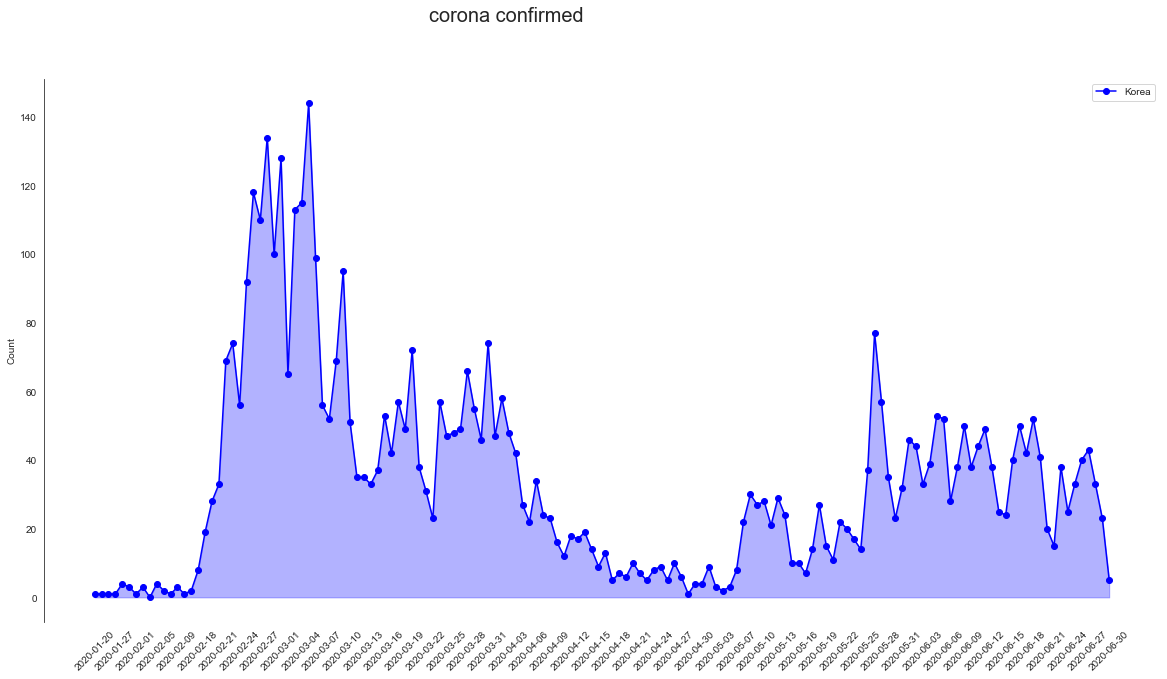

In [30]:
#전국데이터 기준
fig,ax = plt.subplots(figsize = (20,10))
x1 = corona_cnt.confirmed_date
y1 = corona_cnt.city

sns.set_style('white')
ax.plot(x1,y1, label = 'Korea', color='b', marker='o')
plt.fill_between(x1, y1, color = 'b', alpha = .3)
ax.set_xticks(ax.get_xticks()[::3])
plt.xticks(rotation = 45)
plt.suptitle("Corona confirmed", size = 20, ha = 'right')
plt.ylabel('Count')
plt.legend()
sns.despine(top = True, bottom = True)
plt.show()

In [33]:
#서울경기 지역만 기록한 확진자수
capital_corona = patient.loc[(patient['province'] == 'Seoul') | (patient['province'] == 'Gyeonggi-do')].reset_index(drop = True)
corona_cnt_capital= pd.DataFrame(capital_corona.groupby(dim)[['city']].count().to_records())

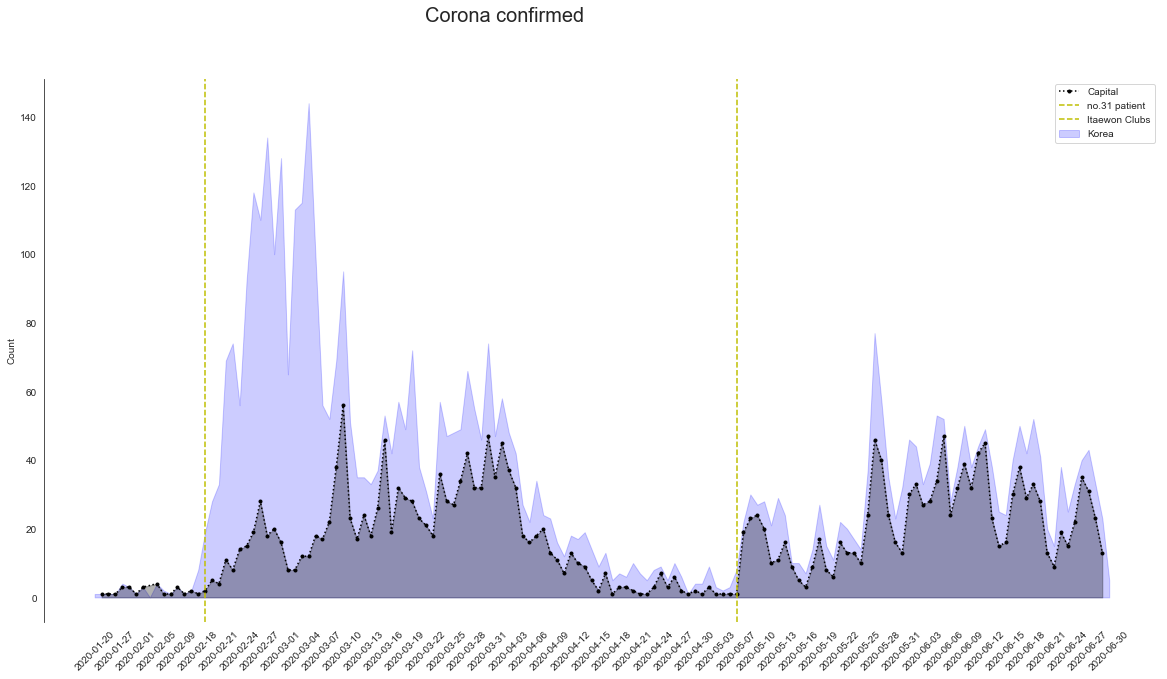

In [46]:
fig,ax = plt.subplots(figsize = (20,10))
x1 = corona_cnt_capital.confirmed_date
y1 = corona_cnt_capital.city

x2 = corona_cnt.confirmed_date
y2 = corona_cnt.city

plt.fill_between(x2,y2, color ='blue', alpha=.2 ,label='Korea')
sns.set_style('white')
ax.plot(x1,y1, label = 'Capital', color='black',linestyle=':', marker='.')
plt.fill_between(x1, y1, color = 'black', alpha = .3)
ax.set_xticks(ax.get_xticks()[::3])
plt.xticks(rotation = 45)
plt.suptitle("Corona confirmed", size = 20, ha = 'right')
plt.ylabel('Count')
plt.axvline(x = '2020-02-19', color = 'y', linestyle = '--', label = 'no.31 patient')
plt.axvline(x = '2020-05-07', color = 'y', linestyle = '--', label = 'Itaewon Clubs')
plt.legend()
sns.despine(top = True, bottom = True)
plt.show()

- 파란색이 전국데이터 검정색이 경기/서울데이터
- 31번 신천지(대구발)이 터지고나서는 수도권외의 확진자수가 많이나왔다(대구가 대부분)
- 이태원 클럽발 이후에는 전국데이터와 경기/서울데이터의 흐름이 양상이 비슷해짐을 알수있다.

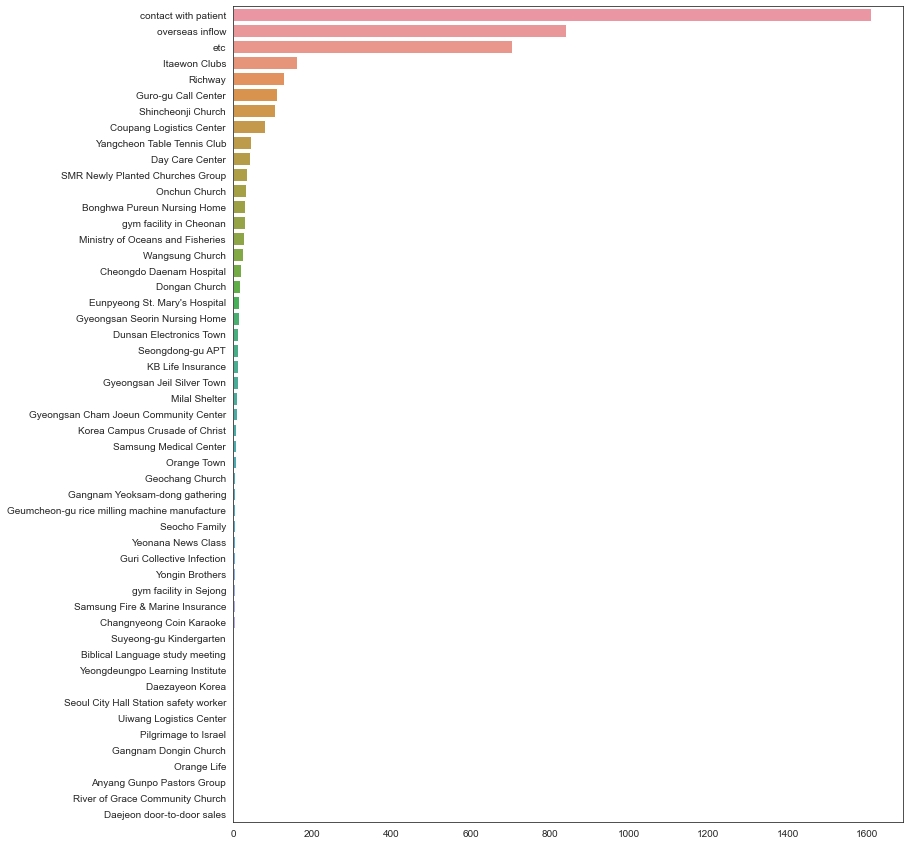

In [47]:
# 코로나-19 감염경로
corona_infection = patient['infection_case'].value_counts().sort_values(ascending = False)

# 시각화
plt.figure(figsize = (12,15))
sns.barplot(x = corona_infection.values, y = corona_infection.index)
plt.show()

생각정리
1) 산소호흡을통해 감염 되는것과 타인의 접촉으로 인함 감염으로 인하여 '비대면' 이라는것이 하나의 문화로 자리 잡았음
2) 그에 따라 배달문화가 확산된 것도 있지만 배달은 원래부터 우리나라의 문화였고 그 속도가 가속화 된것으로 알 수 있음
3) 비단 배달시장이 커진것뿐만 아니라, 화상회의, 재택근무, 메타버스 등 4차산업에 관련된 산업들도 같이 가속화 되었음

* 코로나가 없어진다고 해서 지금 자리잡은 문화가 사라질것 같지는 않다.
* 또다른 대유행 감염병이 도래했을때 대처가능한 유연한 정보를 보여주는것도 좋을듯.

In [50]:
# 각 컬럼별 value 확인
def unique_values(data):
    for c in data.columns:
        print(f'{c}[{len(data[c].unique())}] \n{data[c].unique()}')
        print('-------------------------')

In [52]:
unique_values(policy)

policy_id[61] 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61]
-------------------------
country[1] 
['Korea']
-------------------------
type[8] 
['Alert' 'Immigration' 'Health' 'Social' 'Education' 'Technology'
 'Administrative' 'Transformation']
-------------------------
gov_policy[24] 
['Infectious Disease Alert Level' 'Special Immigration Procedure'
 'Mandatory 14-day Self-Quarantine'
 'Mandatory Self-Quarantine & Diagonostic Tests'
 'Emergency Use Authorization of Diagnostic Kit'
 'Drive-Through Screening Center' 'Mask Distribution'
 'Social Distancing Campaign' 'Thanks to Challenge korea' 'School Closure'
 'School Opening Delay' 'School Opening with Online Class' 'Open Data '
 'Open API' 'Self-Diagnosis App' 'Self-Quarantine Safety Protection App'
 'Electronic Wristbands' 'Close bars and clubs'
 'local government Administrative orders' 'Close 

In [53]:
policy
# 정책id / 국가/ 유형 / 정부정책 / 세부사항/ 시작일 / 종료일

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN


In [54]:
policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   policy_id   61 non-null     int64 
 1   country     61 non-null     object
 2   type        61 non-null     object
 3   gov_policy  61 non-null     object
 4   detail      59 non-null     object
 5   start_date  61 non-null     object
 6   end_date    24 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


In [55]:
policy['start_date'] = pd.to_datetime(policy['start_date'])
policy['end_date'] = pd.to_datetime(policy['end_date'])

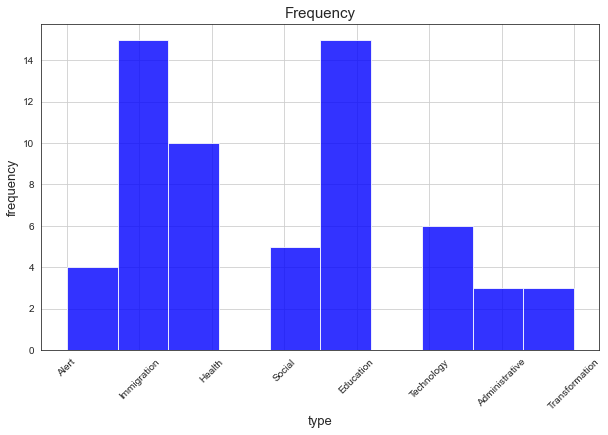

In [66]:
#유형별 빈도수

plt.figure(figsize = (10,6))
plt.title("Frequency", fontsize=15)
frq, bins, fig = plt.hist(policy["type"], bins=10, alpha=.8, color='b')
plt.ylabel("frequency", fontsize=13)
plt.xlabel("type", fontsize=13)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

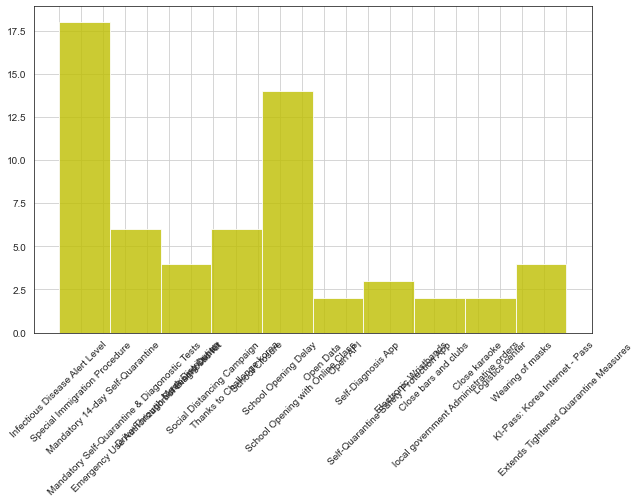

In [72]:
plt.figure(figsize = (10,6))

frq, bins, fig = plt.hist(policy["gov_policy"], bins=10, alpha=.8, color='y')
plt.xticks(rotation = 45)
plt.grid()
plt.show()